In [1]:
from astropy.io import fits as astro_fits  
from astropy.io.fits import getdata

import copy
import glob

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import matplotlib as mpl 
from matplotlib.collections import LineCollection


import numpy as np
from IPython.display import HTML

import astropy.table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize, LogStretch 

#These packages are for Using TrackPy
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp 
from numpy import sqrt  

In [2]:
List_2 = glob.glob(r'C:\Users\14242\2022 Summer Internship\Sun Pics Part 2 (10 pics)\*')

In [3]:
data_average = [] #Averages subtracted data
data_median = [] #Median subtracted data
for Polar in List_2: 
    Polardata = getdata(Polar) 
    data_average.append(Polardata - np.average(Polardata)) 
    data_median.append(Polardata - np.median(Polardata))  
    
Arr=np.array(data_average)#Converts Arr list into numpy array

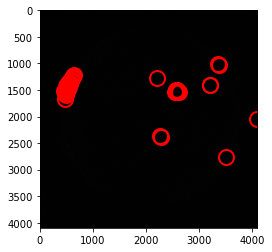

In [4]:
#Use trackpy to locate Gaussian-like blobs of some image
f = tp.locate(Arr[0], 11, invert = True, minmass = 70) 

tp.annotate(f,Arr[0]);#Creates the graph of f 

In [5]:
#Tells us the frames and features of the photos 
r = tp.batch(Arr,11, minmass =50); 

Frame 9: 172 features


In [6]:
t = tp.link(r,5,memory = 9)

Frame 9: 172 trajectories present.


In [7]:
t1 = tp.filter_stubs(t,5) #Filters out Spurious traj 
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 677
After: 139


In [8]:
#This cell will be for the code to filter out the particals that are not needed 
t2 = t1[((t1['mass'] <400 ) & (t1['size'] > 2.2) &
         (t1['ecc'] < 1))]

In [9]:
#Variable of original radius of the sun. 
R = 1625.691406

In [10]:
iloc_valid = []

for i in range(len(t)): #I changed f into t 
    r = np.sqrt((t2['x'].iloc[i]- 2070.828369)**2 + (t2['y'].iloc[i] - 2008.760620)**2)
    if r<R: 
        print (r, t2['particle'].iloc[i])
        iloc_valid.append(i)
  

1310.0122946769181 7
1324.6344228800185 8
1532.5956079959215 10
1615.8715442070736 12
617.4255229141545 17
641.7165331263342 18
676.6424513546959 19
665.1199739983867 21
678.9327322113858 26
1611.3514018291044 27
1624.9308009123406 28
1610.2995676914966 29
1581.6142906210787 30
1500.1226583981406 34
1518.756939135953 37
1075.8818865783487 41
931.8096551189237 43
1404.4740548524371 44
1475.088802907278 47
1526.3008050326814 52
1595.112149410915 57
726.7895786043396 59
1518.312543059864 60
721.0605359060778 61
727.5878124236253 67
745.8407260546937 69
1229.7609188872839 70
1256.9238436833666 72
1275.3616359869848 80
1231.9775560624546 85
1389.9183542681835 87
671.5308056060018 88
1305.273055955475 90
1289.1368190583771 93
691.058937136354 95
705.5000234656508 96
693.2468449219405 100
723.9700787135994 101
1502.1799472576909 105
1029.5350504943162 106
1293.0931290127924 108
709.1675780140703 114
1310.57943366254 7
1325.0577346346583 8
1612.4586068499382 130
1624.0695374832092 28
1580.7162

1596.3467311593126 57
1463.845564087545 159
1525.4562410673666 52
1475.5299026260736 47
671.8402638290994 88
1255.5564069322102 72
1228.6441643495323 381
1617.0068919250805 307
728.3141893596436 67
1391.1552546839303 87
1232.548403549061 85
1624.292189648848 201
1501.9427706712295 105
724.4092141967441 101
693.1734217126823 100
696.9059770299115 95
706.4076597148124 96
677.7865656103678 323
733.3787926661266 238
1030.2747278311804 106
709.5849792748567 114
635.8587331188838 461
1294.0611524778092 108


IndexError: single positional indexer is out-of-bounds

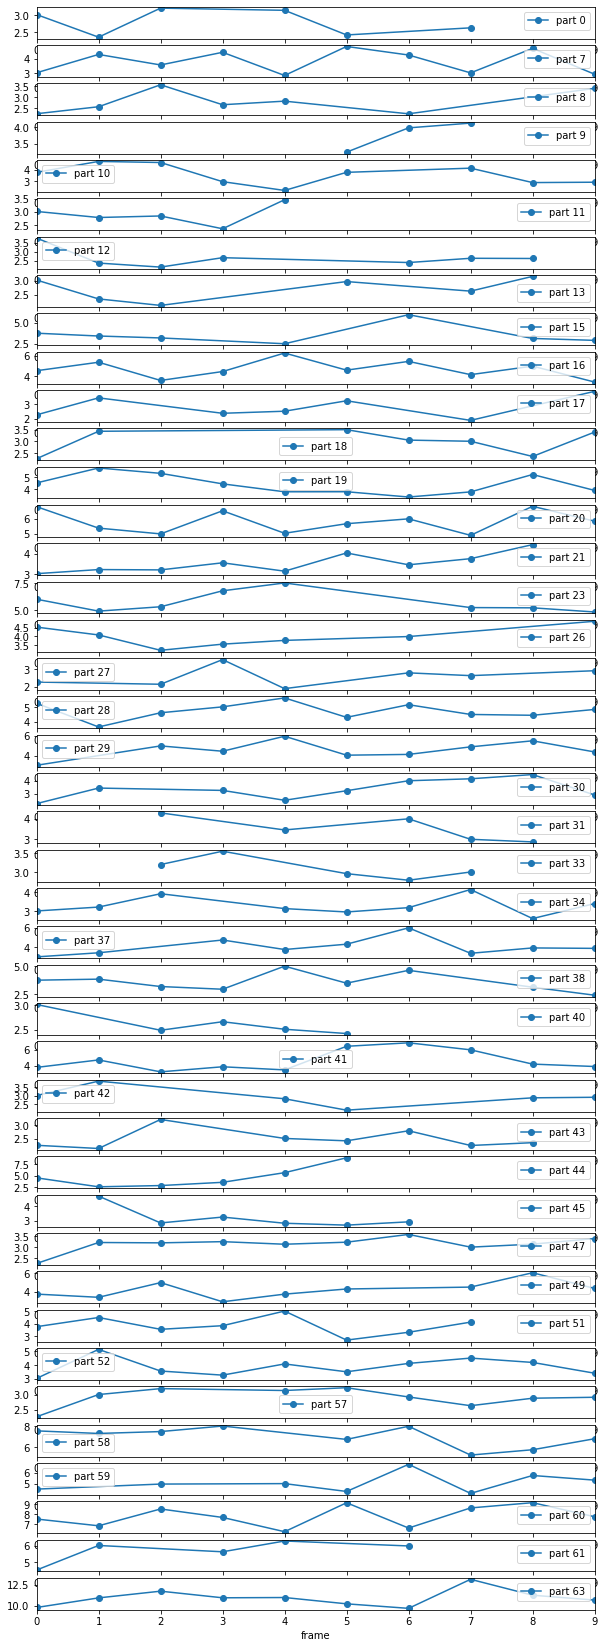

In [11]:
Tot_part = len(t2.iloc[iloc_valid].particle.unique())#Total # of particles        
Position = range(1,Tot_part+1) 
fig = plt.figure(1,figsize = (10,45)) 

i = 0
for p in range(Tot_part): ##Repeats the action below 
       
    if not (t2.loc[t2.particle==p].empty): 
        ax = fig.add_subplot(Tot_part, 1,Position[i])##Defining Plots axis bounds 
        ax.set_xlim((0,9))##Sets Frame bounds 
        t2.loc[t2.particle==p].plot(x='frame',y='signal', 
                               style = '-o',label =f'part {p}',ax=ax) 
        i += 1
plt.show()

In [12]:
Bull=[]
for i in range(10): 
    s= t2.iloc[iloc_valid].loc[i].sum(axis=0).loc['signal']  
    Bull+=[s]

    

In [ ]:
x = np.linspace(0, 9, num=10)
y = np.array(Bull)

plt.title('Light Curve')
plt.plot(x, y, color="red")

plt.show()